## Linear Regression Project
    
    For this project i'll be using Avocado Prices Dataset from Kaggle.https://www.kaggle.com/neuromusic/avocado-prices
    
    The dataset represents weekly retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set.
    
    Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold (small Hass)
    4225 - Total number of avocados with PLU 4225 sold (large Hass)
    4770 - Total number of avocados with PLU 4770 sold (extra large Hass)
    
    Target of this project is to predict the future price of avocados depending on those variables we have.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('avocado.csv',index_col=[0])

#### Data description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
df.describe().round(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000,1.824900e+04,1.824900e+04,1.824900e+04,18249.000,1.824900e+04,1.824900e+04,18249.000,18249.000,18249.000
mean,1.406,8.506440e+05,2.930084e+05,2.951546e+05,22839.736,2.396392e+05,1.821947e+05,54338.088,3106.427,2016.148
std,0.403,3.453545e+06,1.264989e+06,1.204120e+06,107464.068,9.862424e+05,7.461785e+05,243965.965,17692.895,0.940
min,0.440,8.456000e+01,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000,0.000,2015.000
25%,1.100,1.083858e+04,8.540700e+02,3.008780e+03,0.000,5.088640e+03,2.849420e+03,127.470,0.000,2015.000
50%,1.370,1.073768e+05,8.645300e+03,2.906102e+04,184.990,3.974383e+04,2.636282e+04,2647.710,0.000,2016.000
75%,1.660,4.329623e+05,1.110202e+05,1.502069e+05,6243.420,1.107834e+05,8.333767e+04,22029.250,132.500,2017.000
max,3.250,6.250565e+07,2.274362e+07,2.047057e+07,2546439.110,1.937313e+07,1.338459e+07,5719096.610,551693.650,2018.000


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.shape

(18249, 13)

In [7]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [8]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


To summarise the dataset:
14 columns (variables) and 18249 rows (observations).
There isn't any NULL variable.
data types: float64(9), int64(2), object(3).
'region','type' and 'date' columns are in object format.

#### Preprocessing

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df['Month']=df['Date'].apply(lambda time:time.month)

In [11]:
df = df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })

In [12]:
df.sort_values('Date',inplace=True,ascending=True)

#### EDA

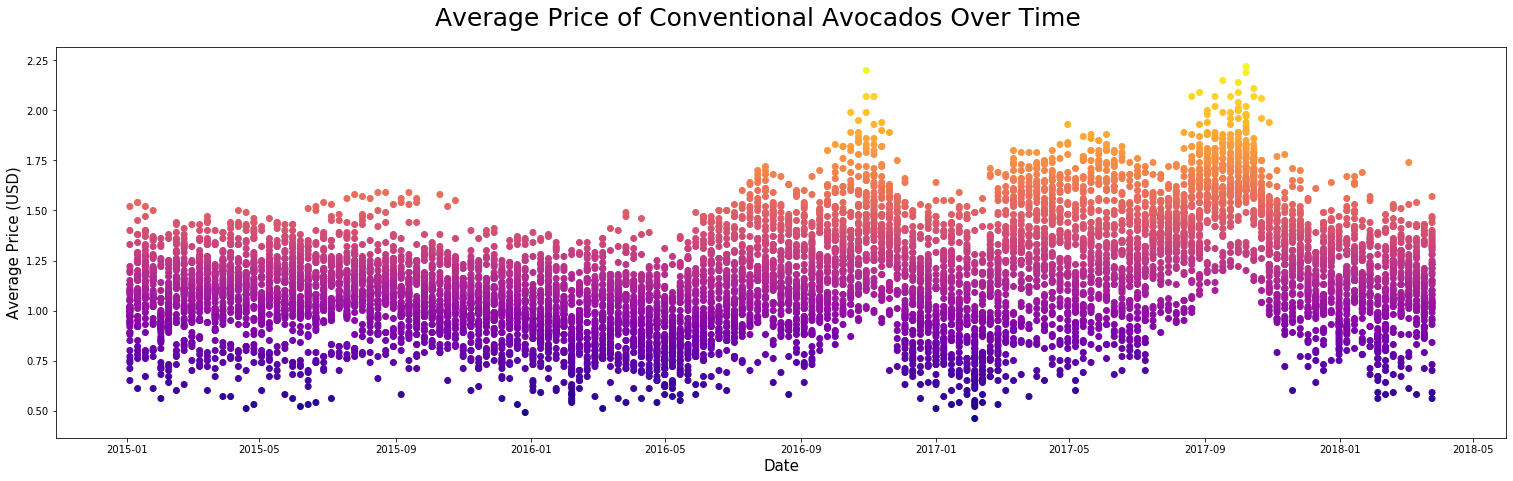

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
mask = df['type']== 'conventional'
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.9)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

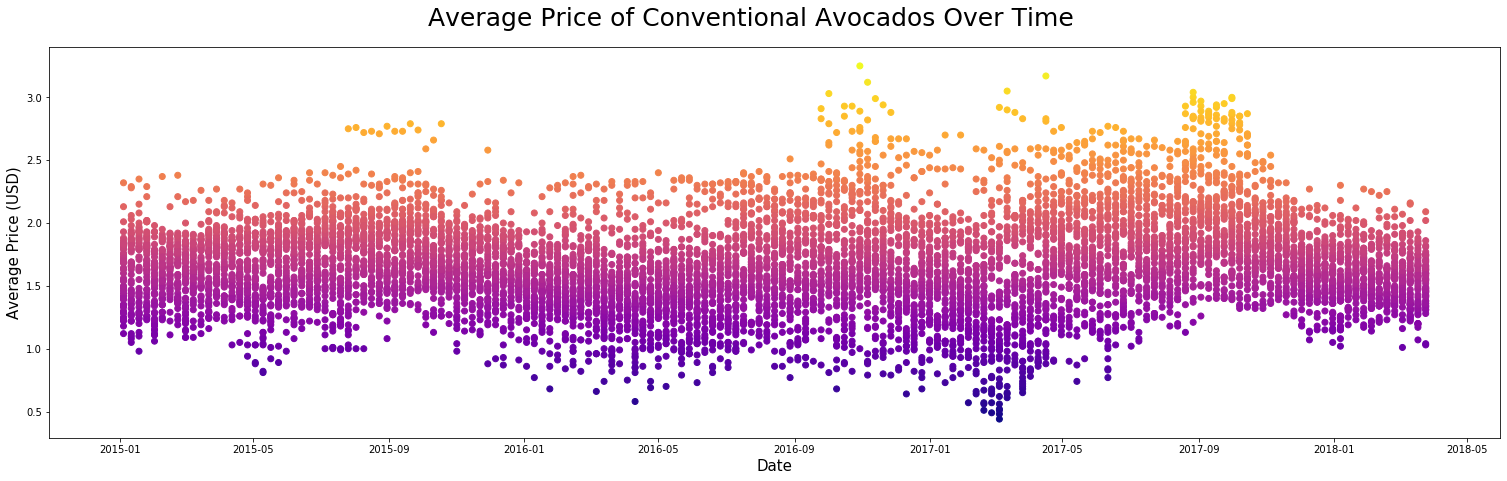

In [14]:
mask = df['type']== 'organic'
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot()
fig.subplots_adjust(top=0.9)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

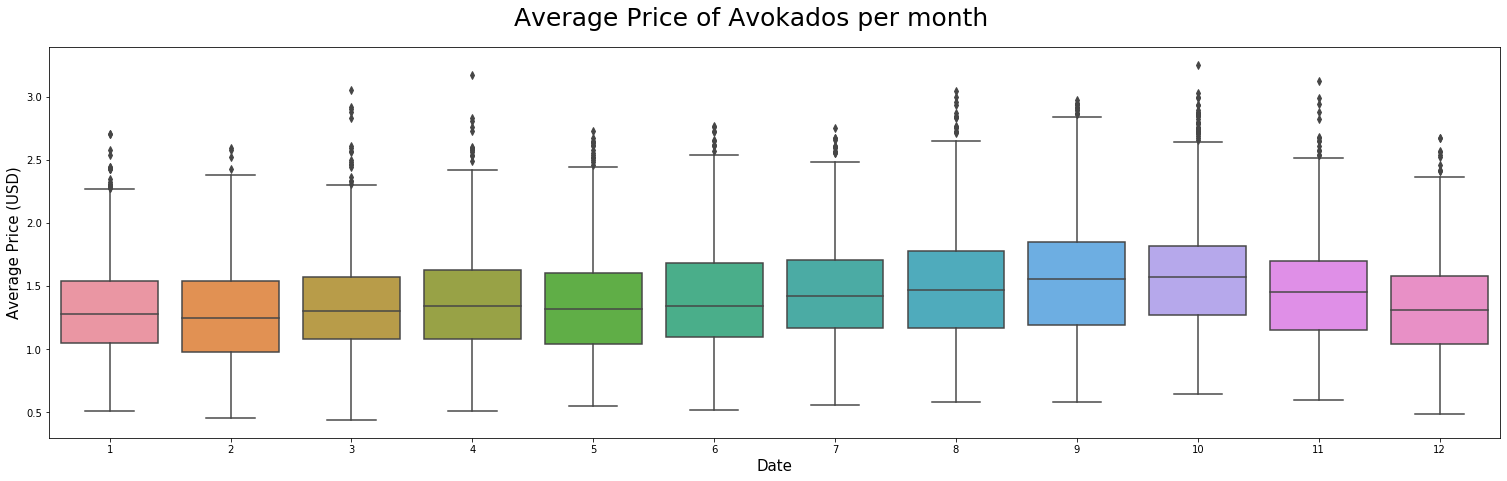

In [15]:
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Avokados per month', fontsize=25)
ax = fig.add_subplot()
fig.subplots_adjust(top=0.9)
sns.boxplot(df['Month'], df['AveragePrice'])
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

Average price of avocados it the highest in September and October.

In [16]:
len(df.region.unique())

54

In [17]:
df.groupby('region').size()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

Approximately, there are 338 observations from each region, sample seems balanced.

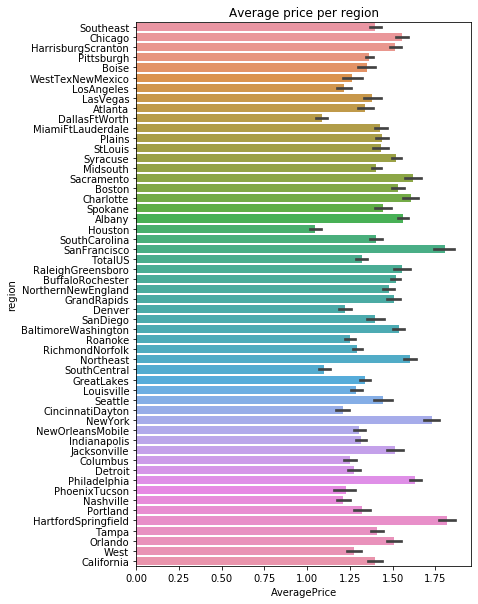

In [18]:
plt.figure(figsize=(6,10))
plt.title('Average price per region')
sns.barplot(x=df['AveragePrice'],y=df['region'])

The highest average price is in San Francisco and Hartford Springfield. The lowest average price is in Houston.

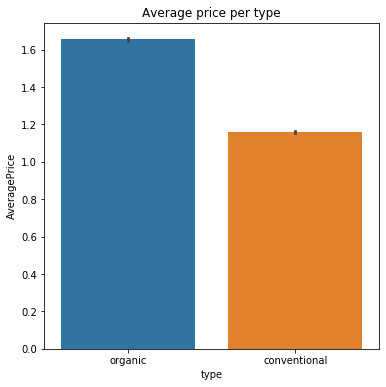

In [19]:
plt.figure(figsize=(6,6))
plt.title('Average price per type')
sns.barplot(x=df['type'],y=df['AveragePrice'])

(12, 0)

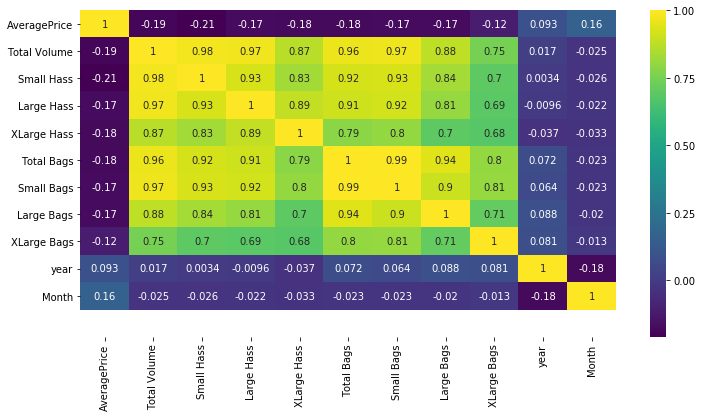

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.ylim(12,0)

There is a high correlation between those pairs: 
small hass & total volume  (0.89)      
total bags & total volume  (0.87)      
small bags & total bags    (0.96)      

Small Hass avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.
Retailers want to increase the sales of bagged avocados instead of bulks.
Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

Total Bags = Small Bags + Large Bags + XLarge Bags.

Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bags

In [21]:
df = df.drop(['Total Bags','Total Volume'],axis=1)

In [22]:
len(df)

18249

In [23]:
df = pd.concat([df.drop(['type','region'],axis=1),pd.get_dummies(df[['type','region']],drop_first=True)],axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,'Small Hass':'XLarge Bags']= scaler.fit_transform(df.loc[:,'Small Hass':'XLarge Bags']) 
df.head()

,Date,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,year,Month,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
51,2015-01-04,1.75,-0.224278,-0.241934,-0.206814,-0.226673,-0.220532,-0.17558,2015,1,...,0,0,1,0,0,0,0,0,0,0
51,2015-01-04,1.49,-0.230695,-0.232148,-0.212540,-0.242963,-0.222734,-0.17558,2015,1,...,0,0,0,0,0,0,0,0,0,0
51,2015-01-04,1.68,-0.231508,-0.244955,-0.212540,-0.240789,-0.222734,-0.17558,2015,1,...,0,0,0,0,0,0,0,0,0,0
51,2015-01-04,1.52,-0.229254,-0.215680,-0.198007,-0.229080,-0.207730,-0.17558,2015,1,...,0,0,0,0,0,0,0,0,0,0
51,2015-01-04,1.64,-0.231635,-0.244189,-0.212540,-0.243927,-0.221965,-0.17558,2015,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
len(df)*0.7

12774.3

In [26]:
X_train=df.drop(['AveragePrice','Date'],axis=1)[0:10172]
y_train=df['AveragePrice'][0:10172]
X_test=df.drop(['AveragePrice','Date'],axis=1)[10172:]
y_test=df['AveragePrice'][10172:]

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
print('MAE: ',mean_absolute_error(y_test, model.predict(X_test)))
print('MSE: ',mean_squared_error(y_test, model.predict(X_test)))
print('RMSE:',np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print ("R2 of Linear Regresson:", model.score(X_train,y_train) )

MAE:  0.3059620361552481
MSE:  0.148920311171448
RMSE: 0.38590194502159225
R2 of Linear Regresson: 0.7136475840324445


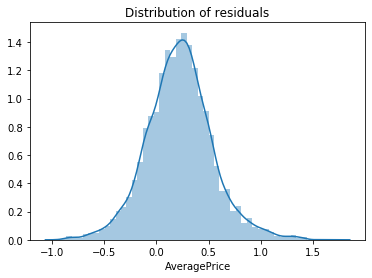

In [32]:
plt.figure(figsize=(6,4))
sns.distplot(y_test - model.predict(X_test))
plt.title('Distribution of residuals');